<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-22 19:13:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.8MB/s    in 2.3s    

2025-06-22 19:13:58 (64.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_1409/2066383291.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)
/tmp/ipykernel_1409/2066383291.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
/tmp/ipykernel_1409/2066383291.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

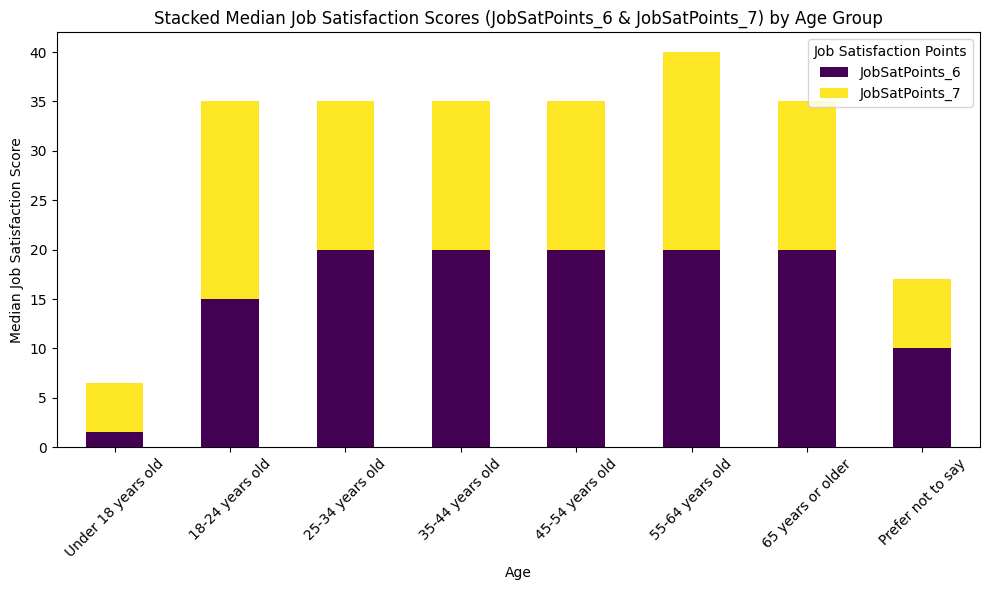

In [7]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Drop rows missing JobSatPoints_6 or JobSatPoints_7 or Age
df_clean = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Age'])

# Define age order if needed (from survey age groups)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older', 'Prefer not to say'
]

# Convert Age to categorical with specified order
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Convert JobSatPoints_6 and JobSatPoints_7 to numeric just in case
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
df_clean['JobSatPoints_7'] = pd.to_numeric(df_clean['JobSatPoints_7'], errors='coerce')

# Group by Age and calculate median for each satisfaction score
median_scores = df_clean.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Plot stacked bar chart
ax = median_scores.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')

# Labels and title
plt.ylabel('Median Job Satisfaction Score')
plt.title('Stacked Median Job Satisfaction Scores (JobSatPoints_6 & JobSatPoints_7) by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_1409/2415287252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
/tmp/ipykernel_1409/2415287252.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatPoints_7'] = pd.to_numeric(df_clean['JobSatPoints_7'], errors='coerce')
/tmp/ipykernel_1409/2415287252.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.

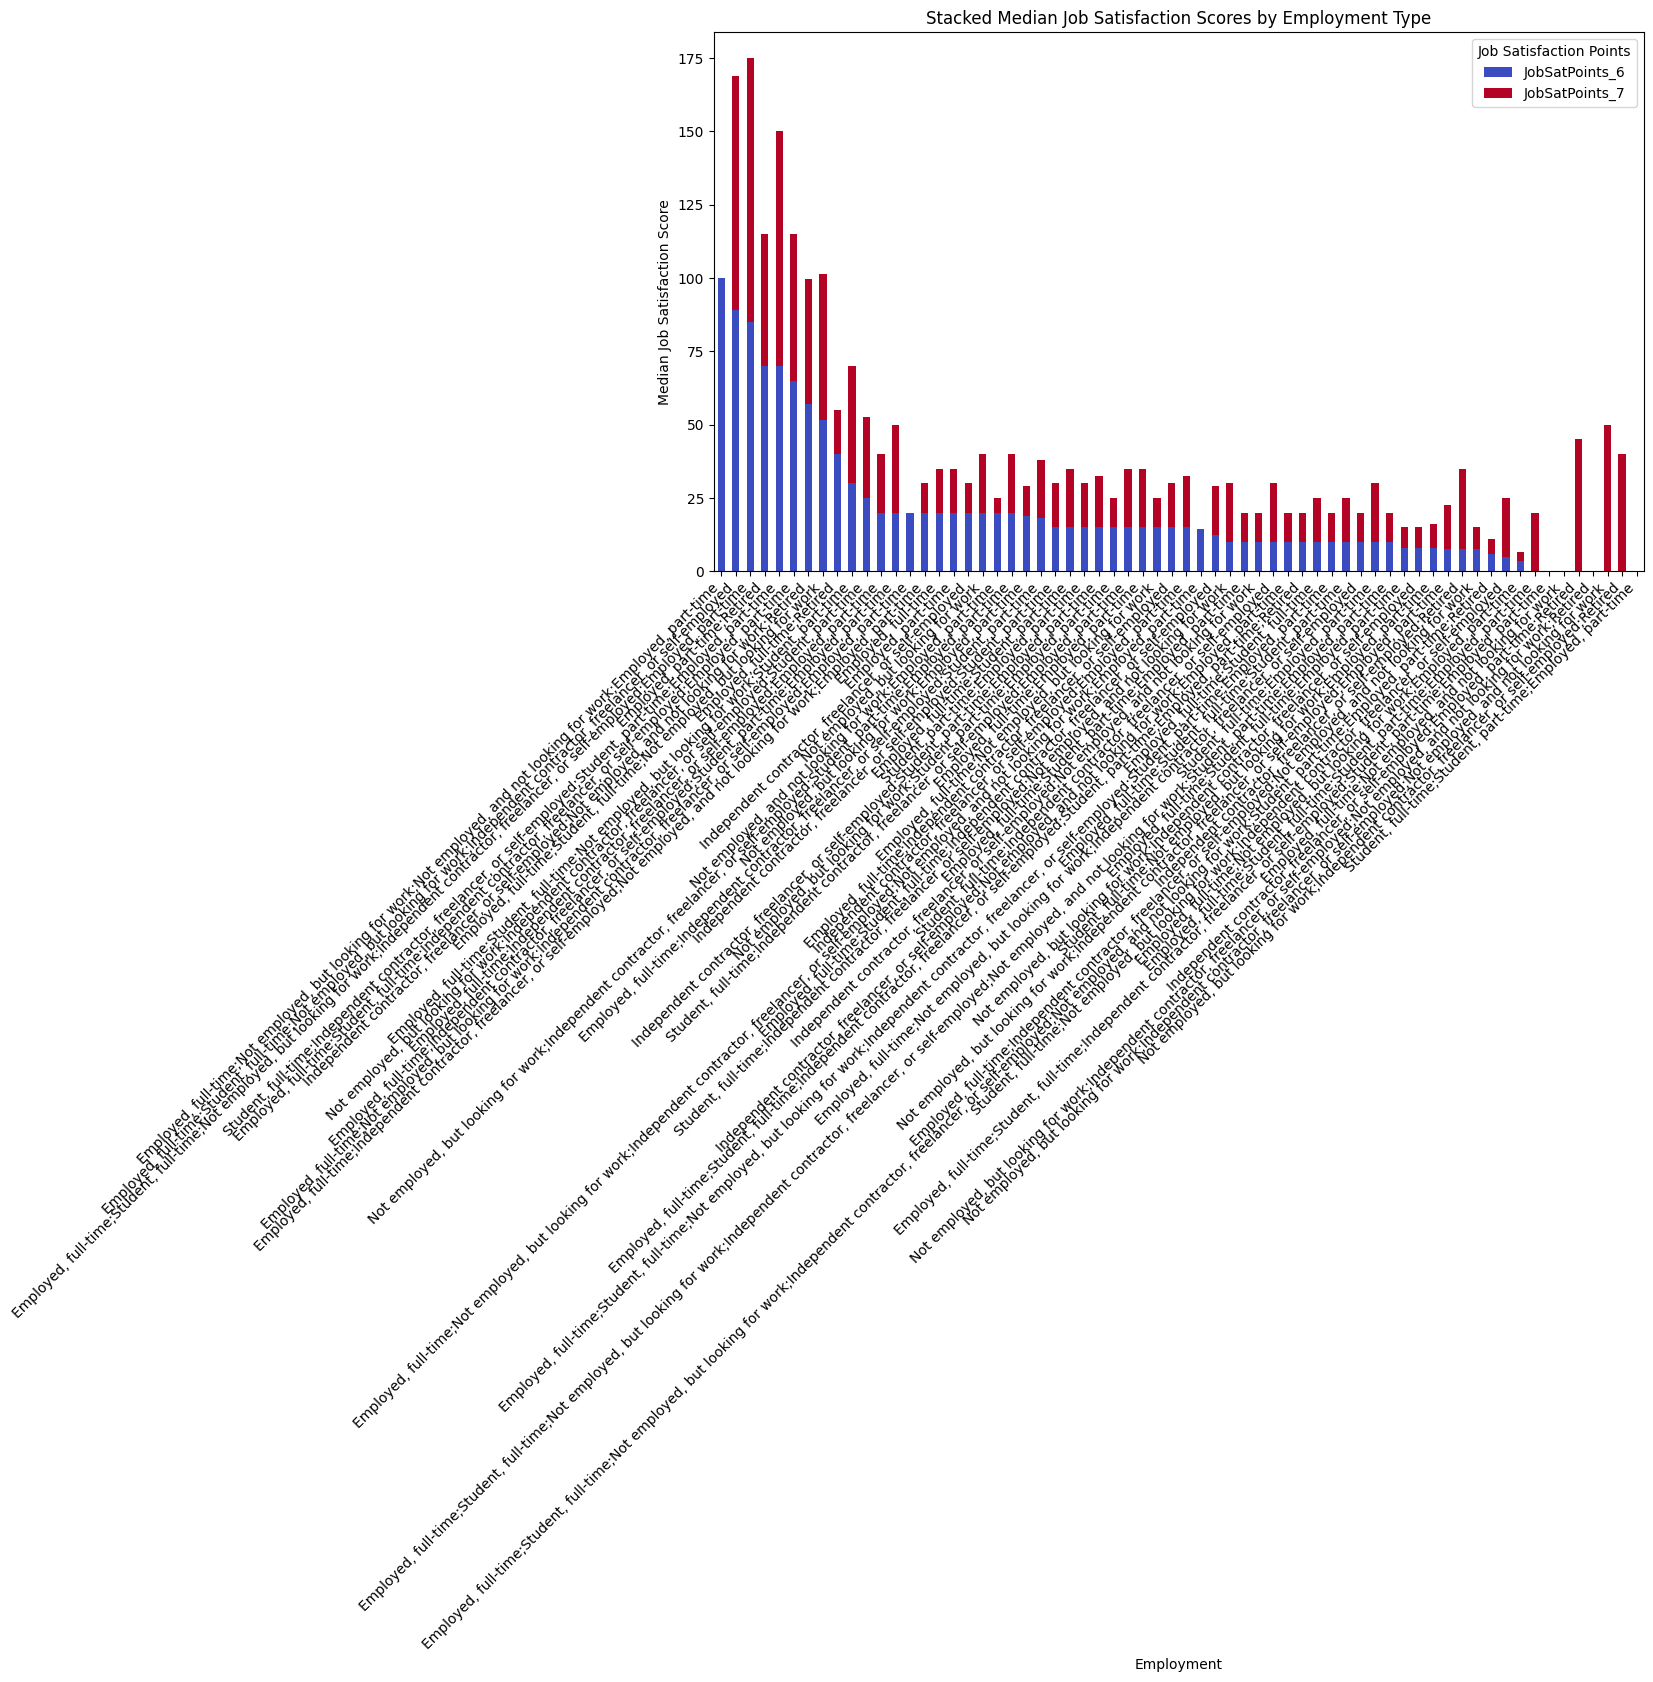

In [8]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Drop rows missing required columns
df_clean = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Employment'])

# Convert satisfaction scores to numeric (just in case)
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
df_clean['JobSatPoints_7'] = pd.to_numeric(df_clean['JobSatPoints_7'], errors='coerce')

# Group by Employment and calculate median satisfaction scores
median_scores = df_clean.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median().dropna()

# Sort by median JobSatPoints_6 for better visualization order (optional)
median_scores = median_scores.sort_values(by='JobSatPoints_6', ascending=False)

# Plot stacked bar chart
ax = median_scores.plot(kind='bar', stacked=True, figsize=(12,7), colormap='coolwarm')

# Labels and title
plt.ylabel('Median Job Satisfaction Score')
plt.title('Stacked Median Job Satisfaction Scores by Employment Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Map Age group to approximate numeric age
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,   # We'll assume average of 30 for the "25-34" group
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Convert Age column using the mapping
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter respondents whose AgeNumeric is between 30 and 35
df_filtered = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]

# Select and show the required columns
selected_columns = df_filtered[['Age', 'AgeNumeric', 'ConvertedCompYearly', 'JobSatPoints_6']]

# Show a sample of the data
print(selected_columns.head(10))


                Age  AgeNumeric  ConvertedCompYearly  JobSatPoints_6
14  25-34 years old        30.0                  NaN             NaN
18  25-34 years old        30.0                  NaN            60.0
20  25-34 years old        30.0                  NaN           100.0
27  25-34 years old        30.0                  NaN            50.0
28  25-34 years old        30.0                  NaN             NaN
29  25-34 years old        30.0                  NaN             NaN
31  25-34 years old        30.0                  NaN             0.0
32  25-34 years old        30.0                  NaN             NaN
35  25-34 years old        30.0                  NaN            30.0
37  25-34 years old        30.0                  NaN             NaN


/tmp/ipykernel_1409/2722496320.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')
/tmp/ipykernel_1409/2722496320.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')


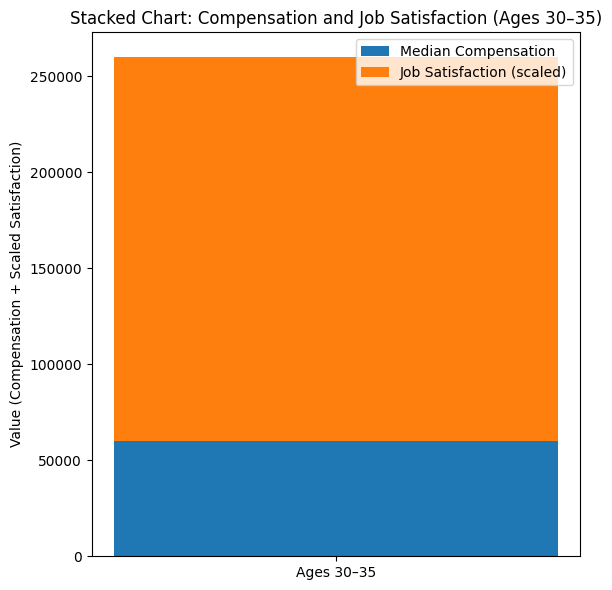

In [11]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")

# Map Age to numeric (midpoint for grouped ranges)
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Filter for respondents in 30–35 range
df_filtered = df[
    (df['AgeNumeric'] >= 30) &
    (df['AgeNumeric'] <= 35) &
    (df['ConvertedCompYearly'].notna()) &
    (df['JobSatPoints_6'].notna())
]

# Convert data types
df_filtered['ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')
df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')

# Drop NaNs again after conversion
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Use median values for each metric
median_comp = df_filtered['ConvertedCompYearly'].median()
median_satisfaction = df_filtered['JobSatPoints_6'].median()

# Scale satisfaction for visualization
satisfaction_scaled = median_satisfaction * 10000

# Create stacked chart
plt.figure(figsize=(6, 6))
plt.bar(['Ages 30–35'], [median_comp], label='Median Compensation')
plt.bar(['Ages 30–35'], [satisfaction_scaled], bottom=[median_comp], label='Job Satisfaction (scaled)')

# Labels and legend
plt.title('Stacked Chart: Compensation and Job Satisfaction (Ages 30–35)')
plt.ylabel('Value (Compensation + Scaled Satisfaction)')
plt.legend()
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


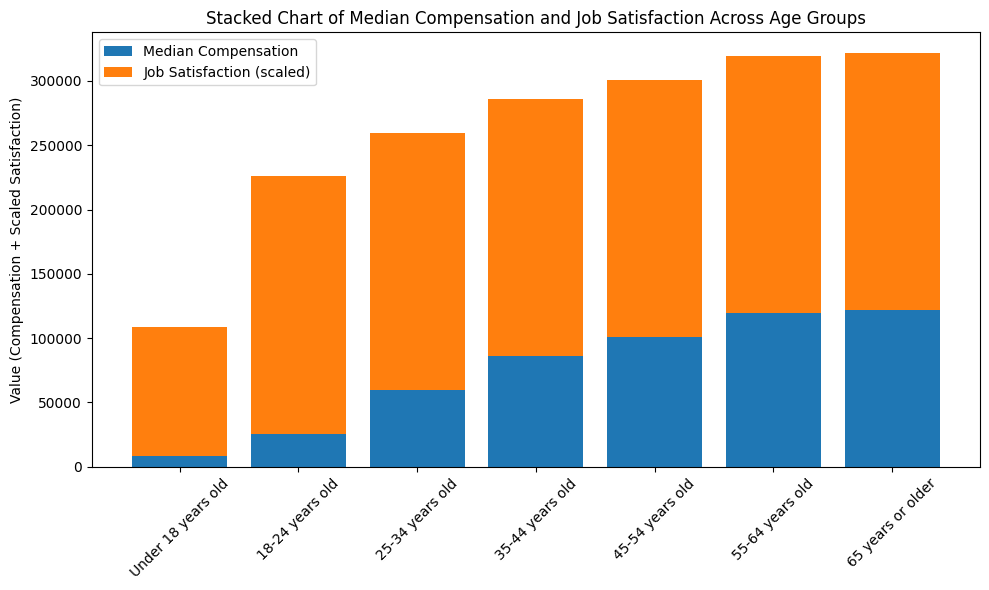

In [12]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Define age group mapping
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]

# Filter relevant rows
df_filtered = df[
    df['Age'].isin(age_order) &
    df['ConvertedCompYearly'].notna() &
    df['JobSatPoints_6'].notna()
].copy()

# Convert to numeric
df_filtered['ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')
df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')

# Drop any rows with remaining NaNs
df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'], inplace=True)

# Group by Age and compute median values
grouped = df_filtered.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().reindex(age_order)

# Scale satisfaction for plotting
grouped['JobSatPoints_6_scaled'] = grouped['JobSatPoints_6'] * 10000  # Adjust scale to match compensation range

# Plot
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['ConvertedCompYearly'], label='Median Compensation')
plt.bar(grouped.index, grouped['JobSatPoints_6_scaled'], bottom=grouped['ConvertedCompYearly'], label='Job Satisfaction (scaled)')

# Labels and formatting
plt.title('Stacked Chart of Median Compensation and Job Satisfaction Across Age Groups')
plt.ylabel('Value (Compensation + Scaled Satisfaction)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


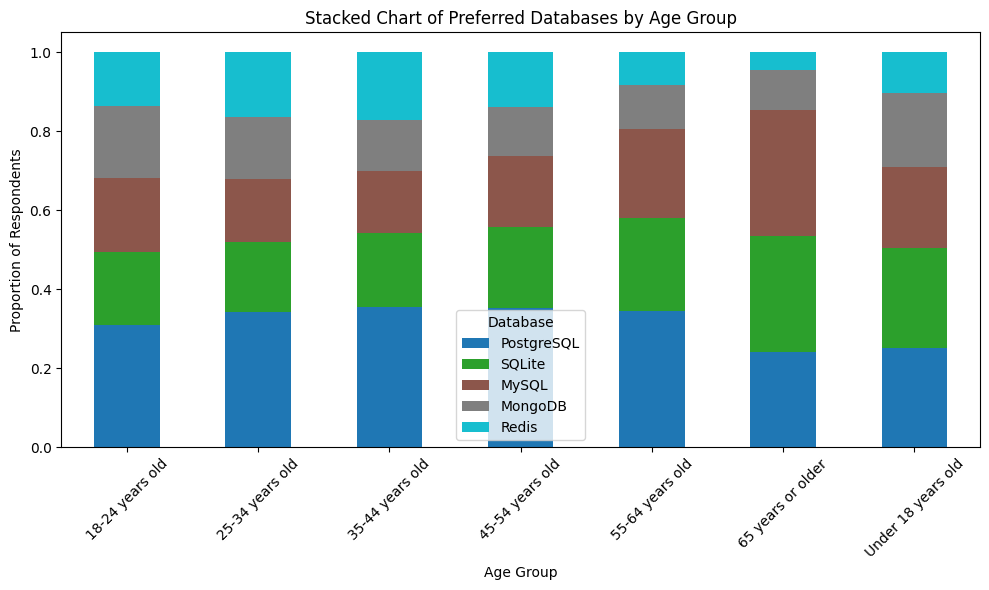

In [13]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['Age', 'DatabaseWantToWorkWith'])

# Filter valid age groups (ignore "Prefer not to say")
valid_ages = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_clean = df_clean[df_clean['Age'].isin(valid_ages)]

# Split multiple database responses into separate rows
df_clean = df_clean.assign(DatabaseWantToWorkWith=df_clean['DatabaseWantToWorkWith'].str.split(';'))
df_exploded = df_clean.explode('DatabaseWantToWorkWith')

# Count database preferences by age
db_counts = df_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().unstack(fill_value=0)

# Focus on top 5 databases across all ages
top_dbs = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5).index
db_counts_top = db_counts[top_dbs]

# Normalize for proportion per age group (optional)
db_props = db_counts_top.div(db_counts_top.sum(axis=1), axis=0)

# Plot stacked bar chart
db_props.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab10')

# Format chart
plt.title('Stacked Chart of Preferred Databases by Age Group')
plt.ylabel('Proportion of Respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Database')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_1409/199975323.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
/tmp/ipykernel_1409/199975323.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


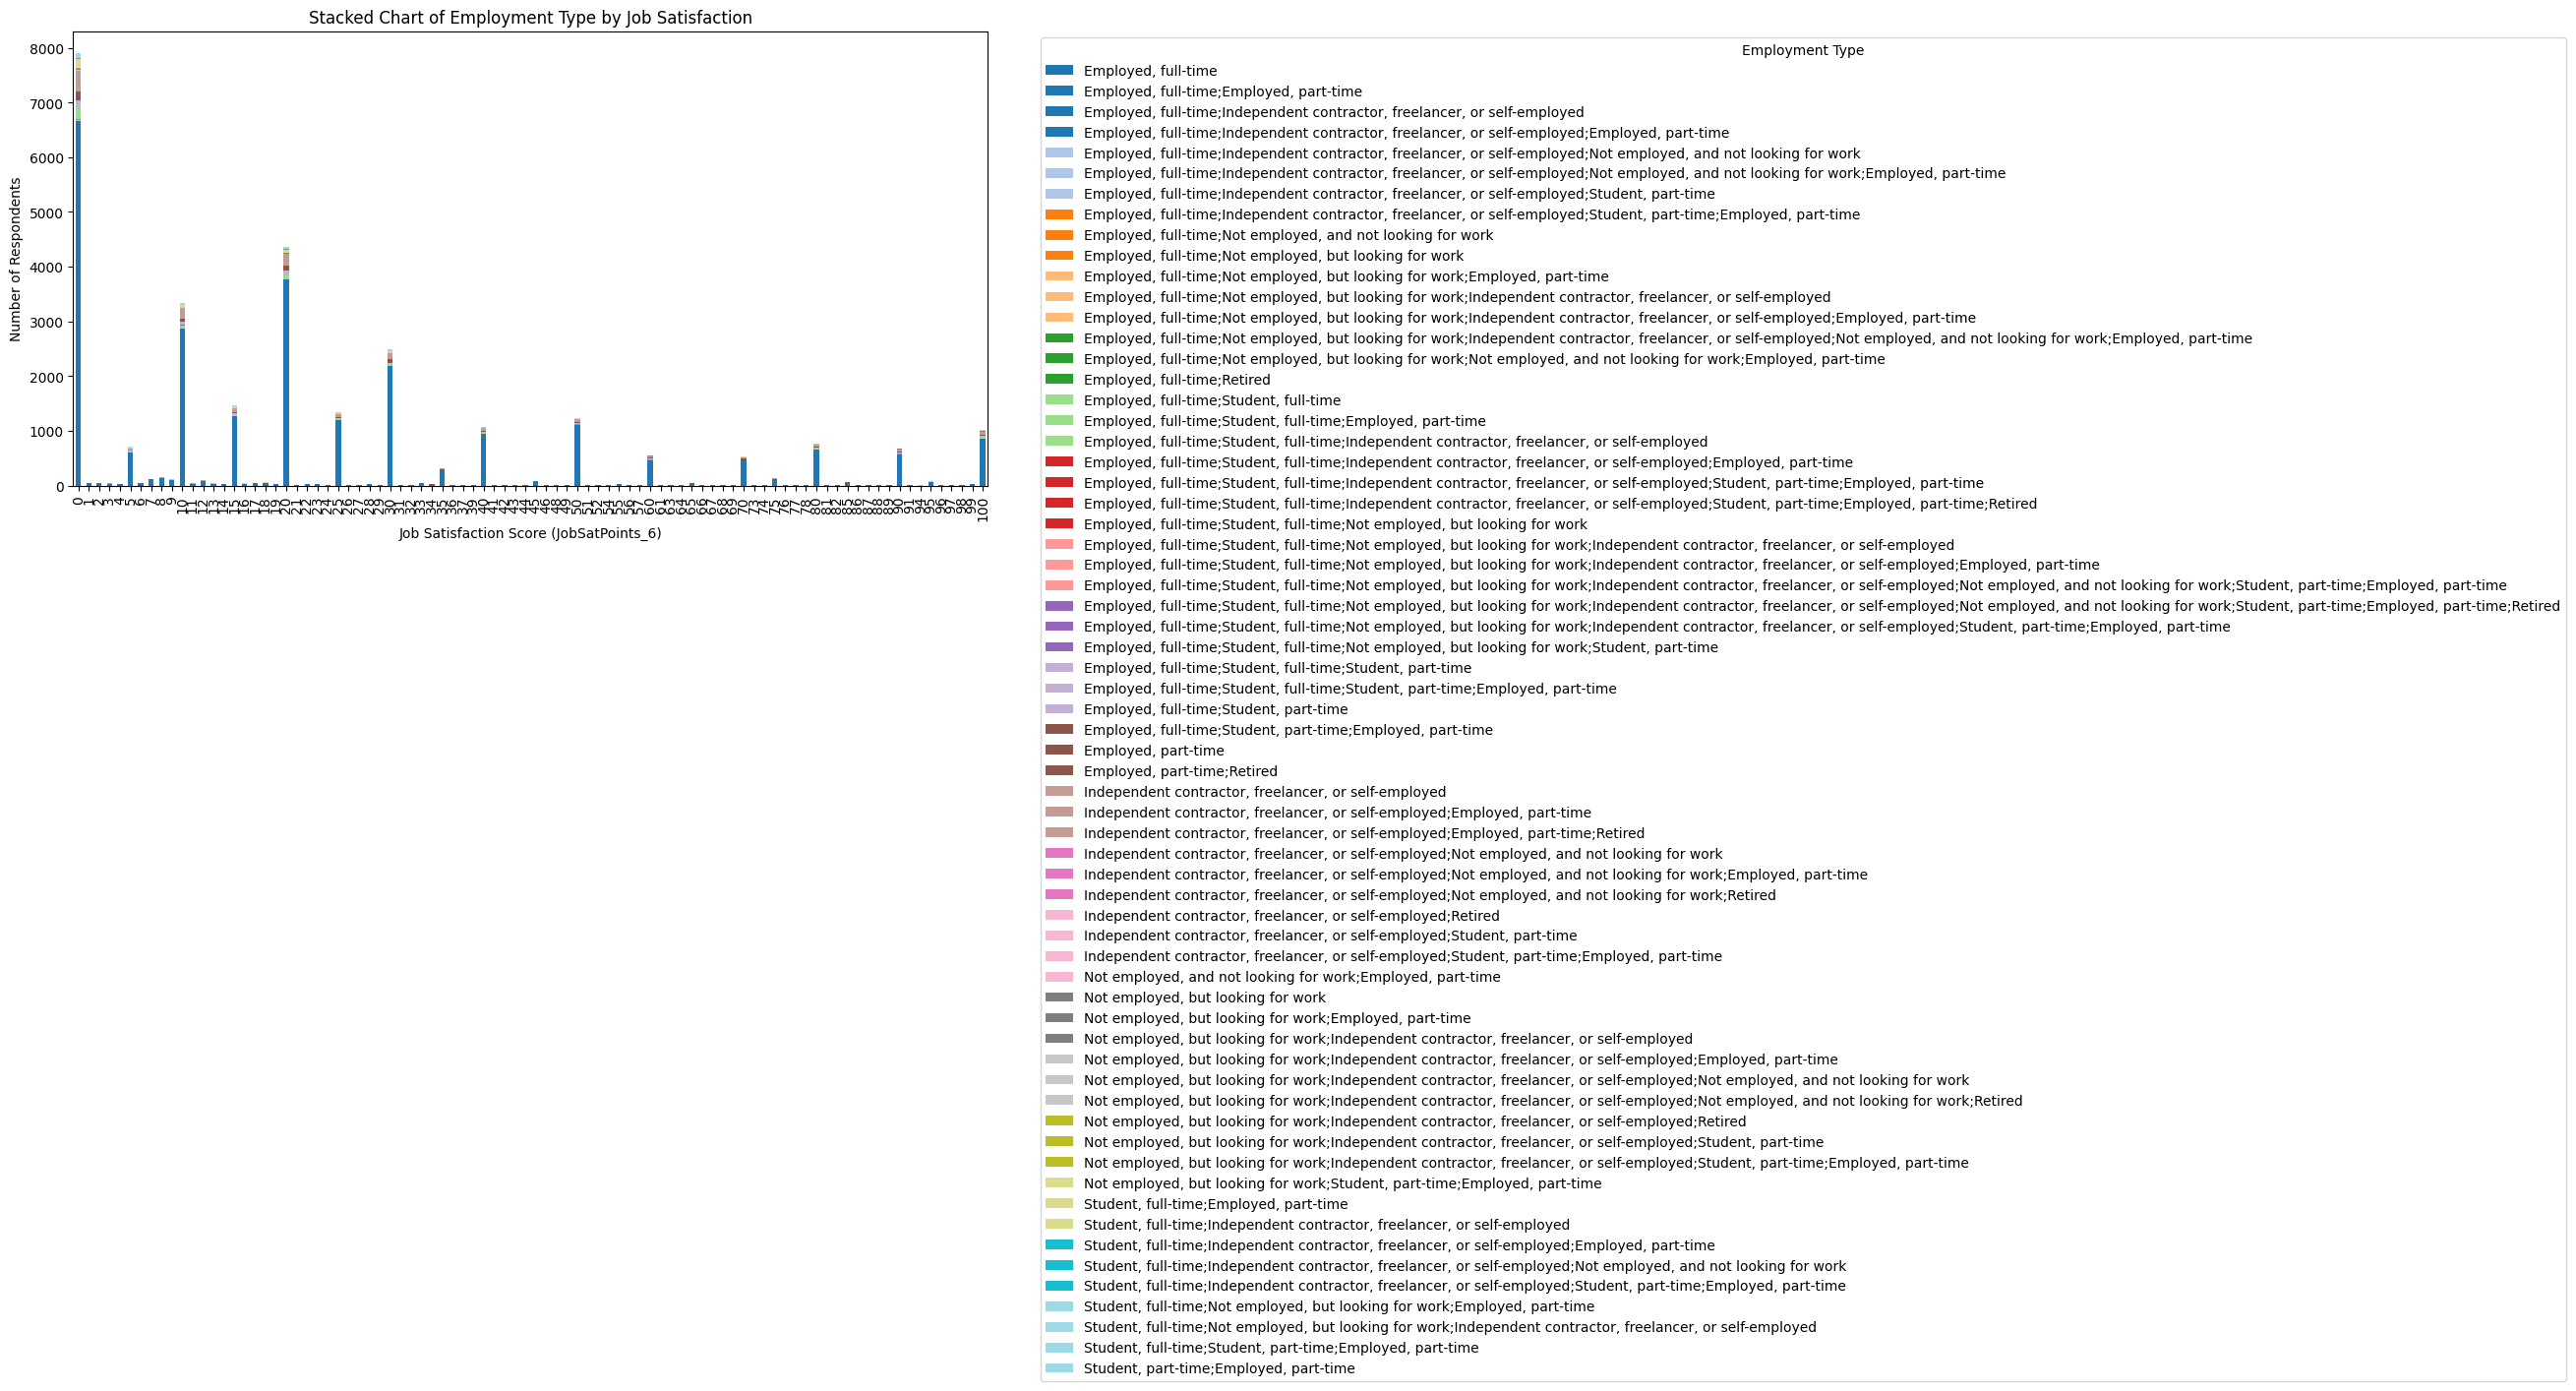

In [14]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Step 1: Drop rows with missing values in 'Employment' and 'JobSatPoints_6'
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Step 2: Convert satisfaction scores to integer bins (optional: round or bucket)
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
df_clean = df_clean.dropna(subset=['JobSatPoints_6'])
df_clean['JobSatPoints_6'] = df_clean['JobSatPoints_6'].astype(int)

# Step 3: Count occurrences of employment types by satisfaction level
job_sat_employment = pd.crosstab(df_clean['JobSatPoints_6'], df_clean['Employment'])

# Step 4: Plot the stacked chart
job_sat_employment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Formatting
plt.title('Stacked Chart of Employment Type by Job Satisfaction')
plt.xlabel('Job Satisfaction Score (JobSatPoints_6)')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


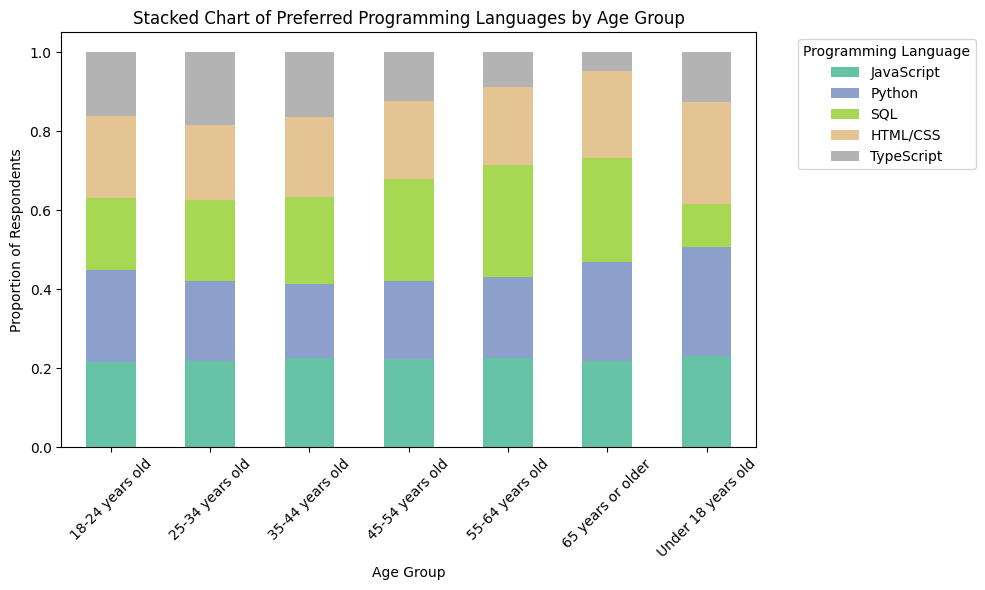

In [15]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 1: Clean data
df_clean = df.dropna(subset=['Age', 'LanguageAdmired'])

# Step 2: Filter valid age groups (exclude "Prefer not to say")
valid_ages = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_clean = df_clean[df_clean['Age'].isin(valid_ages)]

# Step 3: Split languages into rows
df_clean = df_clean.assign(LanguageAdmired=df_clean['LanguageAdmired'].str.split(';'))
df_exploded = df_clean.explode('LanguageAdmired')

# Step 4: Count preferences by age and language
language_counts = df_exploded.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

# Step 5: Focus on top N languages overall
top_languages = df_exploded['LanguageAdmired'].value_counts().nlargest(5).index
language_counts = language_counts[top_languages]

# Optional: Normalize by age group for proportions
language_props = language_counts.div(language_counts.sum(axis=1), axis=0)

# Step 6: Plot
language_props.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Formatting
plt.title('Stacked Chart of Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_1409/515172072.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


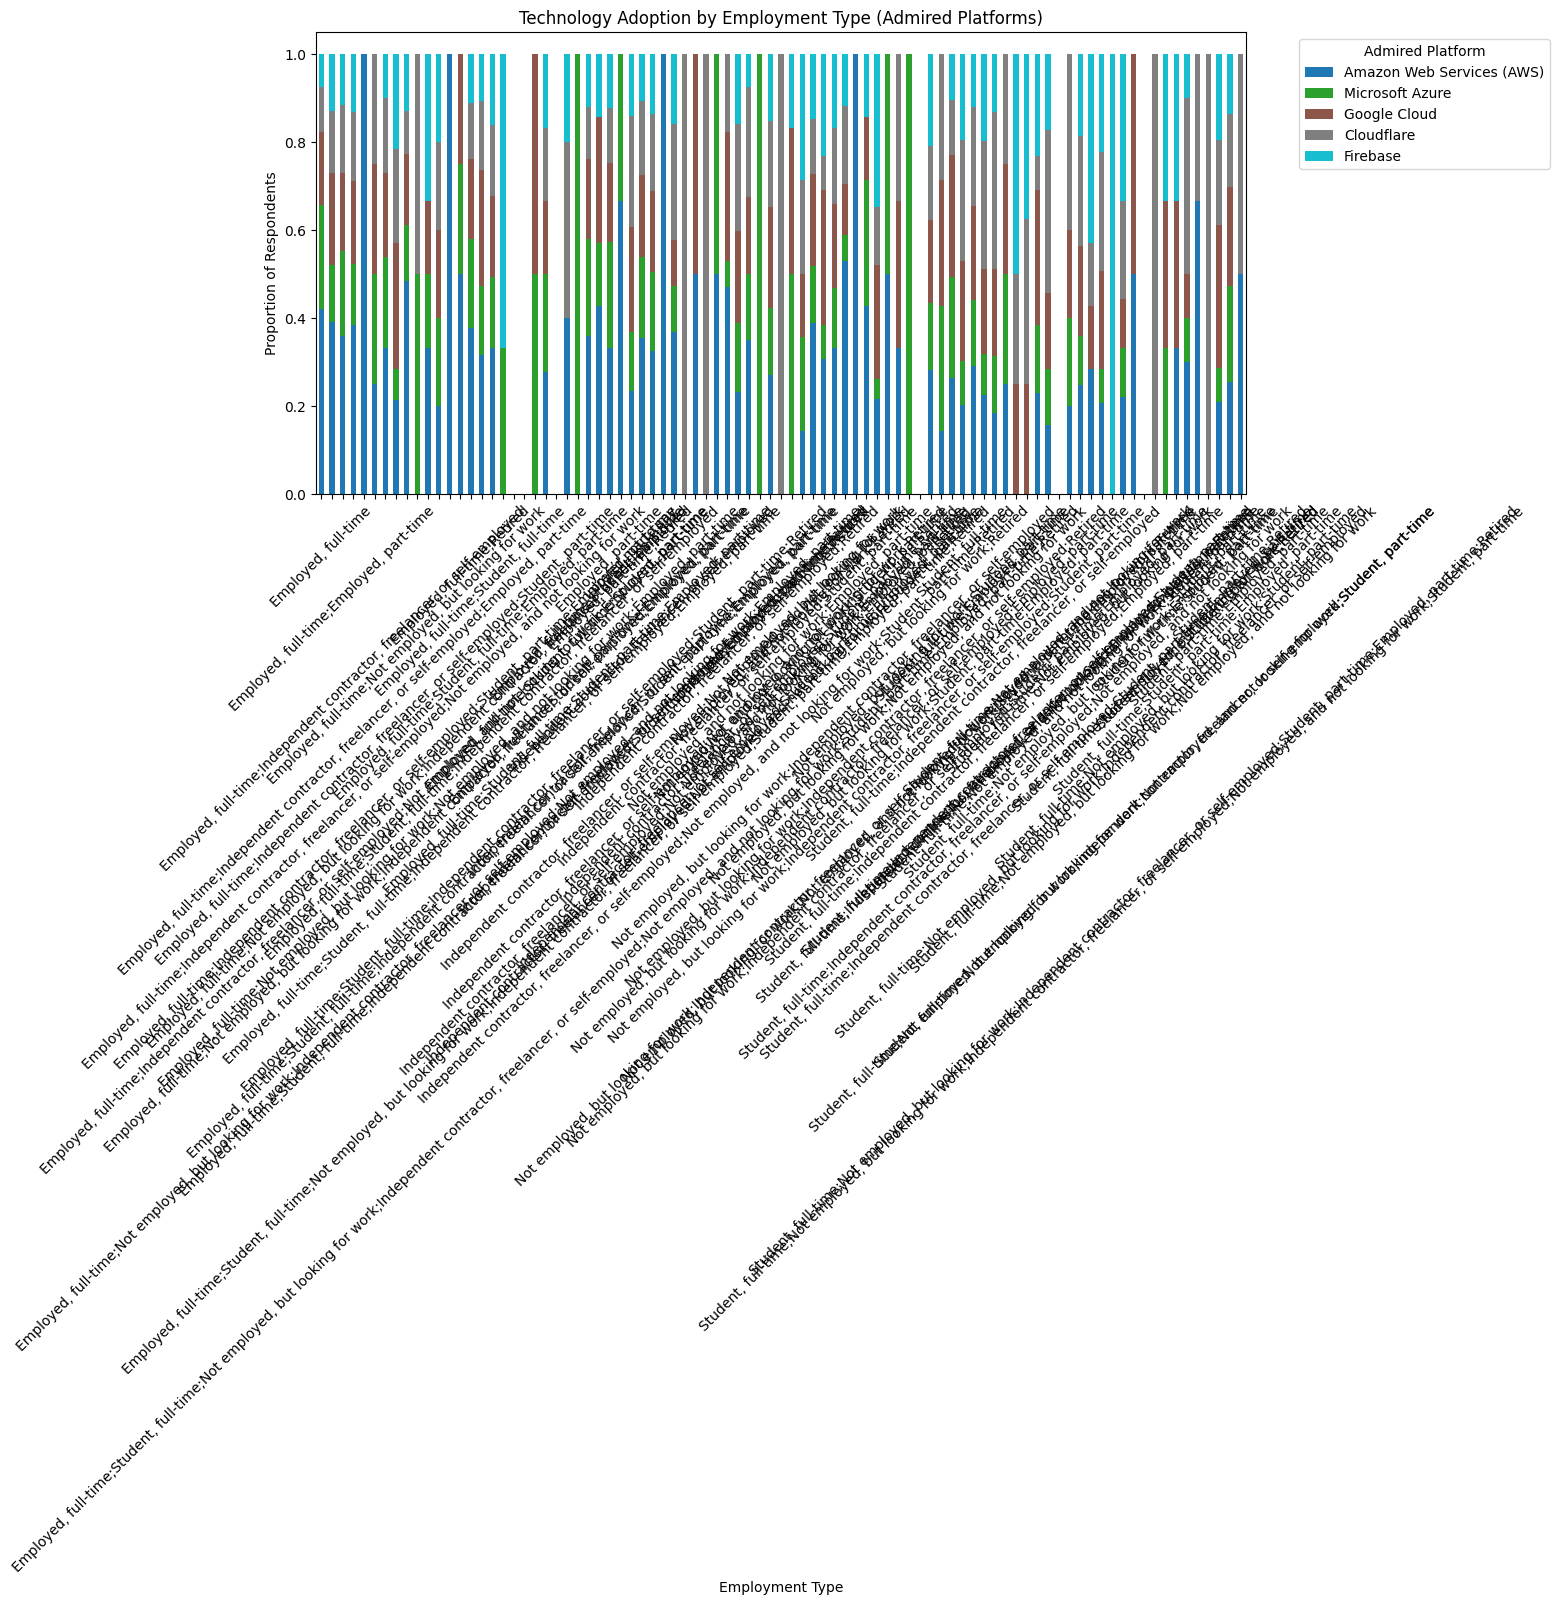

In [16]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Step 1: Clean and filter necessary columns
df_clean = df.dropna(subset=['PlatformAdmired', 'Employment'])

# Step 2: Split semicolon-separated platform responses
df_clean = df_clean.assign(PlatformAdmired=df_clean['PlatformAdmired'].str.split(';'))
df_exploded = df_clean.explode('PlatformAdmired')

# Step 3: Count occurrences of each platform per employment type
platform_counts = df_exploded.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

# Step 4: Focus on the top 5 platforms overall
top_platforms = df_exploded['PlatformAdmired'].value_counts().nlargest(5).index
platform_counts = platform_counts[top_platforms]

# Optional: Normalize counts to proportions per employment type
platform_props = platform_counts.div(platform_counts.sum(axis=1), axis=0)

# Step 5: Plot stacked bar chart
platform_props.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

# Formatting
plt.title('Technology Adoption by Employment Type (Admired Platforms)')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Admired Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
